# Project 3: Reddit's API  WebScrapping for Predicting Comments and Modeling

KIROS Gebremariam, June 2,2018

Data Science Immersive, General Assembly(DC)

In this project, we will practice two major skills. Collecting data via an API request and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to the overall interaction (as measured by number of comments)?_

Your method for acquiring the data will be scraping the 'hot' threads as listed on the [Reddit homepage](https://www.reddit.com/). You'll acquire _AT LEAST FOUR_ pieces of information about each thread:
1. The title of the thread
2. The subreddit that the thread corresponds to
3. The length of time it has been up on Reddit
4. The number of comments on the thread

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts whether or not a given Reddit post will have above or below the _median_ number of comments.

**BONUS PROBLEMS**
1. If creating a logistic regression, GridSearch Ridge and Lasso for this model and report the best hyperparameter values.
1. Scrape the actual text of the threads using Selenium (you'll learn about this in Webscraping II).
2. Write the actual article that you're pitching and turn it into a blog post that you host on your personal website.

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. 

*NOTE*: Reddit will throw a [429 error](https://httpstatuses.com/429) when using the following code:
```python
res = requests.get(URL)
```

This is because Reddit has throttled python's default user agent. You'll need to set a custom `User-agent` to get your request to work.
```python
res = requests.get(URL, headers={'User-agent': 'YOUR NAME Bot 0.1'})
```

#### Setup

In [1]:
## YOUR CODE HERE

In [2]:
# importing Necessary Library
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
from bs4 import BeautifulSoup

# setting the visual
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline     

####  WebScraping and Gathering Data

In [3]:
#select URL to gather info
url = "https://www.reddit.com/hot.json"

In [4]:
# headers of 'User-agent' is required if you don't
# want a 429 error as it limits your returns.
headers= ({'User-agent': 'kiros Bot 0.1'})

In [5]:
res = requests.get(url, headers=headers)    # Sending an HTTP request with URL and the Requesting agent as header

In [6]:
res.status_code   # Checking the HTTPS Response

200

In [7]:
# return the requested page into a json object
data = res.json()   

In [8]:
# json objects are interactable in the way python dicts are.
data.keys()

dict_keys(['kind', 'data'])

In [9]:
data['data'].keys()    # getting the data Keys

dict_keys(['modhash', 'dist', 'children', 'after', 'before'])

In [10]:
sorted(data['data'].keys())     # sorting  the data dictionary

['after', 'before', 'children', 'dist', 'modhash']

In [11]:
# once we sort them we can create a data frame for the first 25 default Json files ready to be dowlaoded
pd.DataFrame(data['data']['children'])    # will give us the kind of data as well as the subreddit id

,data,kind
0,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
1,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
2,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
3,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
4,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
5,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
6,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
7,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
8,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
9,"{'is_crosspostable': False, 'subreddit_id': 't...",t3


In [12]:
data['data']['children'][0]['data']     # getting the data dictionary from the json file

{'is_crosspostable': False,
 'subreddit_id': 't5_2yuej',
 'approved_at_utc': None,
 'wls': 6,
 'mod_reason_by': None,
 'banned_by': None,
 'num_reports': None,
 'removal_reason': None,
 'thumbnail_width': 140,
 'subreddit': 'iamverysmart',
 'selftext_html': None,
 'author_flair_template_id': None,
 'selftext': '',
 'likes': None,
 'suggested_sort': None,
 'user_reports': [],
 'secure_media': None,
 'is_reddit_media_domain': True,
 'saved': False,
 'id': '8ogkqn',
 'banned_at_utc': None,
 'mod_reason_title': None,
 'view_count': None,
 'archived': False,
 'clicked': False,
 'no_follow': False,
 'author': 'AdmiralHall',
 'num_crossposts': 0,
 'link_flair_text': '/r/all',
 'can_mod_post': False,
 'send_replies': False,
 'pinned': False,
 'score': 13763,
 'approved_by': None,
 'over_18': False,
 'report_reasons': None,
 'domain': 'i.redd.it',
 'hidden': False,
 'preview': {'images': [{'source': {'url': 'https://i.redditmedia.com/Q-5iK5qLnDV7WK-awCWHtbCugDX4pEe0I9qnFS-GCP8.jpg?s=c0bd176d214

In [13]:
data['data']['after']   # this will give us the last id dowloaded and i will use it in the definition below

't3_8ofboi'

In [14]:
# the above one can be also done using the list comprehension 
# the Top 25 posts that we need to look them
[post['data']['name'] for post in data['data']['children']]  # this will print out all the 25 default ids from reddit

['t3_8ogkqn',
 't3_8og8fn',
 't3_8ogaj5',
 't3_8og3c8',
 't3_8ogfki',
 't3_8ofvcn',
 't3_8og7qa',
 't3_8ofvv4',
 't3_8og1w0',
 't3_8ofwzc',
 't3_8ogdrl',
 't3_8ogdp4',
 't3_8og7ws',
 't3_8ofka8',
 't3_8ogss2',
 't3_8og8sd',
 't3_8og5fs',
 't3_8og1eo',
 't3_8ofn76',
 't3_8ofxab',
 't3_8ofod3',
 't3_8ogahz',
 't3_8ogne9',
 't3_8of6wp',
 't3_8ofboi']

In [15]:
len(data['data']['children'])   # checking the length 

25

In [16]:
data['kind']   # checking what kind of data it is

'Listing'

In [17]:
for listing in data['data']['children']:
    print(listing['data']['author'])                     # just the foor loop for printing the reddit data  
    print(listing['data']['subreddit'])
    print(listing['data']['url'])
    print('------------------------')

AdmiralHall
iamverysmart
https://i.redd.it/43n16c6y0z111.jpg
------------------------
d3frost
pics
https://i.redd.it/tli6xuyvoy111.jpg
------------------------
bioinformative
funny
https://v.redd.it/gdctcl62ry111
------------------------
Botatitsbest
Unexpected
https://i.imgur.com/hbd9uZZ.gifv
------------------------
DeandreSkywalker117
StarWars
https://i.redd.it/wxbig1b1wy111.jpg
------------------------
aki-d4fer
worldnews
https://www.huffingtonpost.com/entry/climate-change-cost_us_5b11bc9de4b010565aac04fa
------------------------
kal127
gatekeeping
https://i.redd.it/qt70wxz5oy111.jpg
------------------------
Upbeatdouncz
wholesomememes
https://i.imgur.com/nn1xWOy.png
------------------------
Zainth
AskReddit
https://www.reddit.com/r/AskReddit/comments/8og1w0/if_you_could_stand_in_one_place_in_the_world_and/
------------------------
EricRavenCZ75
PrequelMemes
https://i.redd.it/tsqi7qpdcy111.jpg
------------------------
Nibbink
comics
https://i.redd.it/cinanseduy111.jpg
-------------

In [18]:
## YOUR CODE HERE

In [19]:
# URL and get request from Reddit
# Here we organized the code described above
# The URL to be scrapped. Header specifiying the agent name
# sending the HTTP request

URL = "http://www.reddit.com/hot.json"
headers={'User-agent': 'kiros Bot 0.1'} 
res = requests.get(URL, headers=headers)
data = res.json()

In [20]:
# create dictionary for the first 25 posts.
df = [child['data'] for child in data['data']['children']]     # to get the first 25 posts
df = pd.DataFrame(df)      # defining DataFrame
fetch_time = pd.Timestamp.utcnow()    # new datetime representing UTC day and time instead of taking the given time on reddit
df['fetched time'] = fetch_time       # this will show the fetch time
df.head()       #  checking the scrapped df top 5 rows by default

,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_css_class,author_flair_template_id,author_flair_text,banned_at_utc,banned_by,...,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls,fetched time
0,None,None,False,AdmiralHall,NaN,None,None,None,None,None,...,140.0,"145, eh?",13768,https://i.redd.it/43n16c6y0z111.jpg,[],None,False,all_ads,6.0,2018-06-04 15:01:17.334308+00:00
1,None,None,False,d3frost,NaN,None,None,None,None,None,...,140.0,Terminator has arrived in China,32925,https://i.redd.it/tli6xuyvoy111.jpg,[],None,False,promo_adult_nsfw,3.0,2018-06-04 15:01:17.334308+00:00
2,None,None,False,bioinformative,NaN,None,None,None,None,None,...,140.0,Extreme jenga,20953,https://v.redd.it/gdctcl62ry111,[],None,False,all_ads,6.0,2018-06-04 15:01:17.334308+00:00
3,None,None,False,Botatitsbest,NaN,None,None,None,None,None,...,140.0,I have a couple of questions,14988,https://i.imgur.com/hbd9uZZ.gifv,[],None,False,all_ads,6.0,2018-06-04 15:01:17.334308+00:00
4,None,None,False,DeandreSkywalker117,NaN,None,None,None,None,None,...,140.0,The Solo’s family,7184,https://i.redd.it/wxbig1b1wy111.jpg,[],None,False,all_ads,6.0,2018-06-04 15:01:17.334308+00:00


## (Optional) Collect more information

While we only require you to collect four features, there may be other info that you can find on the results page that might be useful. Feel free to write more functions so that you have more interesting and useful data.

In [21]:
## YOUR CODE HERE

In [22]:
#scrapping additional pages of reddit on top of the default 25 
# as per the reddit Api terms and conditions the maximum limit to scrap  is 100 and its set below with the URL

last_pname = data['data']['after']
for i in range(6): 
    try:
        URL = "http://www.reddit.com/hot.json?limit=100&after="+ last_pname   # credit kihoon Sihon
        res = requests.get(URL, headers={'User-agent':  'kiros Bot 0.1'})
        if res.status_code == 200:
            data = res.json()
            fetch_time = pd.Timestamp.utcnow()
            last_pname = data['data']['after']
            df_small = [child['data'] for child in data['data']['children']]
            df_small = pd.DataFrame(df_small)
            df = pd.concat([df, df_small], ignore_index=True)
            df['fetched time'] = fetch_time
            time.sleep(3)
            print(URL)
        else:
            print(res.status_code)
            break
    except:
        print("stop data downloading. Awesome ds!")
        break

print(df.shape)
print(df['id'].nunique())    # credit Kihoon
df.head()

stop data downloading. Awesome ds!
(125, 85)
125


,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_css_class,author_flair_template_id,author_flair_text,banned_at_utc,banned_by,...,thumbnail_height,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,None,None,False,AdmiralHall,NaN,None,None,None,None,None,...,140.0,140.0,"145, eh?",13768,https://i.redd.it/43n16c6y0z111.jpg,[],None,False,all_ads,6.0
1,None,None,False,d3frost,NaN,None,None,None,None,None,...,140.0,140.0,Terminator has arrived in China,32925,https://i.redd.it/tli6xuyvoy111.jpg,[],None,False,promo_adult_nsfw,3.0
2,None,None,False,bioinformative,NaN,None,None,None,None,None,...,140.0,140.0,Extreme jenga,20953,https://v.redd.it/gdctcl62ry111,[],None,False,all_ads,6.0
3,None,None,False,Botatitsbest,NaN,None,None,None,None,None,...,140.0,140.0,I have a couple of questions,14988,https://i.imgur.com/hbd9uZZ.gifv,[],None,False,all_ads,6.0
4,None,None,False,DeandreSkywalker117,NaN,None,None,None,None,None,...,140.0,140.0,The Solo’s family,7184,https://i.redd.it/wxbig1b1wy111.jpg,[],None,False,all_ads,6.0


### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

In [23]:
# Export to csv
# after collecting the Data i disabled the save botton as i restart it keeps on holding my computer for long time to process

#### Loading, Data Cleaning and EDA 

#### Load in the the data of scraped results

In [24]:
## YOUR CODE HERE

In [25]:
# checking the easist way of looking the files you have in the directory
import os
print(os.listdir())

['.ipynb_checkpoints', 'Exploratory Analysis and Target selection Proj3- 2-.ipynb', 'medium_comments.png', 'NLP and Modeling  Proj3- 3.ipynb', 'NLP_Proj3- 3-Copy1.ipynb', 'NLP_Proj3- 3.ipynb', 'Pro3ExpFinal.csv', 'Pro3ExpFinal0602.csv', 'Project 3 _EDA_Part_One.ipynb', 'Project three Presentation.ppt', 'Project3edapartone.csv', 'README.md', 'README1.md', 'Reddit06022018.csv', 'Requirements.txt', 'starter-code Project 3 Best.ipynb', '~$Project three Presentation.ppt']


In [26]:
# Lets load the Concatenated DataFrame and the engine specification will help to delimit the outliers
df = pd.read_csv('Reddit06022018.csv',index_col ='Unnamed: 0' , engine='python')

In [27]:
# Checking How big the Data set is
print(df.shape)
print(df.describe())

(31976, 30)
            created        gilded  num_comments  num_crossposts          pwls  \
count  3.197600e+04  31975.000000  31975.000000    31975.000000  28807.000000   
mean   1.527729e+09      0.052854    221.300891        0.881314      5.391190   
std    8.543920e+06      0.497654    541.338123        2.125986      1.644609   
min    1.410000e+02      0.000000      0.000000        0.000000      0.000000   
25%    1.527739e+09      0.000000     18.000000        0.000000      6.000000   
50%    1.527768e+09      0.000000     62.000000        0.000000      6.000000   
75%    1.527797e+09      0.000000    201.000000        1.000000      6.000000   
max    1.527949e+09     14.000000  13789.000000       28.000000      6.000000   

               score  subreddit_subscribers  thumbnail_height  \
count   31975.000000           3.196700e+04      28759.000000   
mean     7062.984550           2.210701e+06        118.072082   
std     12152.151152           5.105496e+06         26.779590  

In [28]:
def mung(dataframe):               # credit Ritika modified from Into EDA
    """ originallly called eda created and shared
    by Ritika Bhasker as Guest lecture @ DC campus
    i modified with adding some   """
    print ("dataframe info \n\n", dataframe.info(),"\n")     # detailed info including memory size
    print("missing values \n\n", dataframe.isnull().sum(),"\n")# Checking missing values
    print ("dataframe types \n\n", dataframe.dtypes,"\n")   # what type of dtypes
    print ("dataframe shape \n\n", dataframe.shape,"\n")      # shape of the DataFrame
    print ("dataframe describe \n", dataframe.describe(include ='all'),"\n")   # statististics
    
    for item in dataframe:
        print (item,dataframe[item].nunique())  # unique values in the DataFrame
mung(df)        # calling the Function

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31976 entries, 0 to 31975
Data columns (total 30 columns):
author                     31976 non-null object
created                    31976 non-null int64
created_utc                31976 non-null object
domain                     31976 non-null object
fetched time               31975 non-null object
gilded                     31975 non-null float64
id                         31975 non-null object
name                       31975 non-null object
num_comments               31975 non-null float64
num_crossposts             31975 non-null float64
permalink                  31975 non-null object
preview                    29191 non-null object
pwls                       28807 non-null float64
score                      31975 non-null float64
spoiler                    31967 non-null object
stickied                   31967 non-null object
subreddit                  31967 non-null object
subreddit_id               31967 non-null object
subre

In [29]:
# Checking missing values
df.isnull().sum().sum()

18962

In [30]:
# checking the null values in the DF , according to Ben this is the fancy one
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)   # credit Ben shaver

thumbnail_width            0.103859
thumbnail_height           0.100607
wls                        0.099356
whitelist_status           0.099356
pwls                       0.099106
preview                    0.087097
subreddit_name_prefixed    0.000281
stickied                   0.000281
subreddit                  0.000281
subreddit_id               0.000281
spoiler                    0.000281
subreddit_subscribers      0.000281
thumbnail                  0.000281
title                      0.000281
ups                        0.000281
url                        0.000281
visited                    0.000281
subreddit_type             0.000281
name                       0.000031
fetched time               0.000031
gilded                     0.000031
id                         0.000031
num_crossposts             0.000031
num_comments               0.000031
permalink                  0.000031
score                      0.000031
domain                     0.000000
created_utc                0

In [31]:
# The method .get_dtype_counts() will help me to see the number of
# columns of each type in the DataFrame
df.get_dtype_counts()

float64    10
int64       1
object     19
dtype: int64

In [32]:
df['id'].value_counts()    # this will help us to see if there is repetition on the titles
# can also show how many times we have scrapped  from this id of the reddit
# However, this i found out there are multiple topics

8nc5u0    80
8nd4dr    62
8n9wuv    54
8ncnpf    52
8n8xa6    50
8naogk    50
8naomm    48
8nadwr    48
8n9wfa    48
8ncw0v    48
8nbjf1    46
8nc57v    46
8nat78    46
8n9twq    46
8nb2ze    46
8naxz4    44
8natqs    44
8nbiqe    44
8nao8g    42
8nar7x    42
8na59b    42
8ngxt0    42
8nagwf    42
8n97rm    42
8naioi    42
8n8vrg    40
8nd3rx    40
8nbb2e    40
8ncr7g    40
8nbx1f    40
          ..
8nk6fh     1
8nto7a     1
8nn8l1     1
8nhyz4     1
8ntnx8     1
8nmbwt     1
8nnzsq     1
8nma9d     1
8no89u     1
8nhmjf     1
8nlchn     1
8nk6xm     1
8njqal     1
8nohwj     1
8nm6ek     1
8nhq7d     1
8nmxm1     1
8nk2qn     1
8nond4     1
8nm8s1     1
8nt8fi     1
8nnjqe     1
8nihq4     1
8nlmv1     1
8nmpm8     1
8nhv44     1
8ni9hg     1
8nnhs7     1
8njgm6     1
8nkxnn     1
Name: id, Length: 3138, dtype: int64

In [33]:
df.info()     # looking on the details of the information and memory size

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31976 entries, 0 to 31975
Data columns (total 30 columns):
author                     31976 non-null object
created                    31976 non-null int64
created_utc                31976 non-null object
domain                     31976 non-null object
fetched time               31975 non-null object
gilded                     31975 non-null float64
id                         31975 non-null object
name                       31975 non-null object
num_comments               31975 non-null float64
num_crossposts             31975 non-null float64
permalink                  31975 non-null object
preview                    29191 non-null object
pwls                       28807 non-null float64
score                      31975 non-null float64
spoiler                    31967 non-null object
stickied                   31967 non-null object
subreddit                  31967 non-null object
subreddit_id               31967 non-null object
subre

In [34]:
# Summarize the scrapped documents from hot.json
df.groupby('domain').count().sort_values('id',ascending=False).head(25)

,author,created,created_utc,fetched time,gilded,id,name,num_comments,num_crossposts,permalink,...,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,ups,url,visited,whitelist_status,wls
domain,,,,,,,,,,,,,,,,,,,,,
i.redd.it,15610,15610,15610,15610,15610,15610,15610,15610,15610,15610,...,15610,15610,15610,15610,15610,15610,15610,15610,13662,13662
i.imgur.com,5340,5340,5340,5340,5340,5340,5340,5340,5340,5340,...,5340,5340,5340,5340,5340,5340,5340,5340,4931,4931
v.redd.it,1946,1946,1946,1946,1946,1946,1946,1946,1946,1946,...,1946,1946,1946,1946,1946,1946,1946,1946,1724,1724
imgur.com,1325,1325,1325,1325,1325,1325,1325,1325,1325,1325,...,1325,1325,1325,1325,1325,1325,1325,1325,1245,1245
gfycat.com,881,881,881,881,881,881,881,881,881,881,...,881,881,881,881,881,881,881,881,805,805
twitter.com,399,399,399,399,399,399,399,399,399,399,...,399,399,387,387,399,399,399,399,363,363
youtube.com,314,314,314,314,314,314,314,314,314,314,...,314,314,314,314,314,314,314,314,284,284
youtu.be,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,146,146
self.Jokes,101,101,101,101,101,101,101,101,101,101,...,101,101,3,0,101,101,101,101,101,101


In [35]:
# The Duplicates have diffrent time fetched the file
df.sort_values(by=['title','num_comments'],inplace =True)
df.head()

,author,created,created_utc,domain,fetched time,gilded,id,name,num_comments,num_crossposts,...,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,ups,url,visited,whitelist_status,wls
10525,BatterySun,1527733664,1527704864,i.redd.it,2018-05-31 10:38:40.296091+00:00,0.0,8nayfv,t3_8nayfv,15.0,0.0,...,public,image,140.0,140.0,!remindme one year,691.0,https://i.redd.it/dcc96sxdd1111.jpg,False,all_ads,6.0
11525,BatterySun,1527733664,1527704864,i.redd.it,2018-05-31 10:57:07.800747+00:00,0.0,8nayfv,t3_8nayfv,15.0,0.0,...,public,image,140.0,140.0,!remindme one year,691.0,https://i.redd.it/dcc96sxdd1111.jpg,False,all_ads,6.0
26901,BatterySun,1527733664,1527704864,i.redd.it,2018-05-31 10:38:40.296091+00:00,0.0,8nayfv,t3_8nayfv,15.0,0.0,...,public,image,140.0,140.0,!remindme one year,691.0,https://i.redd.it/dcc96sxdd1111.jpg,False,all_ads,6.0
27901,BatterySun,1527733664,1527704864,i.redd.it,2018-05-31 10:57:07.800747+00:00,0.0,8nayfv,t3_8nayfv,15.0,0.0,...,public,image,140.0,140.0,!remindme one year,691.0,https://i.redd.it/dcc96sxdd1111.jpg,False,all_ads,6.0
3511,Intrilo,1527840458,1527811658,neatclip.com,2018-06-01 02:12:38.468957+00:00,0.0,8nneak,t3_8nneak,705.0,0.0,...,public,https://a.thumbs.redditmedia.com/Zi8erFLMaiDsn...,78.0,140.0,"""ARAB ANDY"" scares the shit out of a college c...",2993.0,https://neatclip.com/clip/pv2dBwoD,False,house_only,1.0


In [36]:
df.corr()   # checking the correlation of the features

,created,gilded,num_comments,num_crossposts,pwls,score,subreddit_subscribers,thumbnail_height,thumbnail_width,ups,wls
created,1.000000,0.023145,0.026277,0.056465,0.044397,0.053168,0.105775,0.003446,0.002272,0.053175,0.046541
gilded,0.023145,1.000000,0.302367,0.156512,0.013145,0.278500,0.093051,0.000077,0.005961,0.278497,0.014653
num_comments,0.026277,0.302367,1.000000,0.381493,0.007407,0.609028,0.441866,-0.138620,-0.091612,0.609018,-0.009028
num_crossposts,0.056465,0.156512,0.381493,1.000000,0.067763,0.636639,0.304715,-0.011253,-0.050700,0.636620,0.066972
pwls,0.044397,0.013145,0.007407,0.067763,1.000000,0.064228,0.134742,-0.011450,-0.020952,0.064293,0.986786
score,0.053168,0.278500,0.609028,0.636639,0.064228,1.000000,0.469127,-0.048306,-0.123870,1.000000,0.064846
subreddit_subscribers,0.105775,0.093051,0.441866,0.304715,0.134742,0.469127,1.000000,-0.057422,-0.077990,0.469127,0.125324
thumbnail_height,0.003446,0.000077,-0.138620,-0.011253,-0.011450,-0.048306,-0.057422,1.000000,0.112134,-0.048306,-0.016843
thumbnail_width,0.002272,0.005961,-0.091612,-0.050700,-0.020952,-0.123870,-0.077990,0.112134,1.000000,-0.123870,-0.021596
ups,0.053175,0.278497,0.609018,0.636620,0.064293,1.000000,0.469127,-0.048306,-0.123870,1.000000,0.064846


In [37]:
#  This will totally remove all duplicates 
df.drop_duplicates(['title'],keep= 'first',inplace =True)

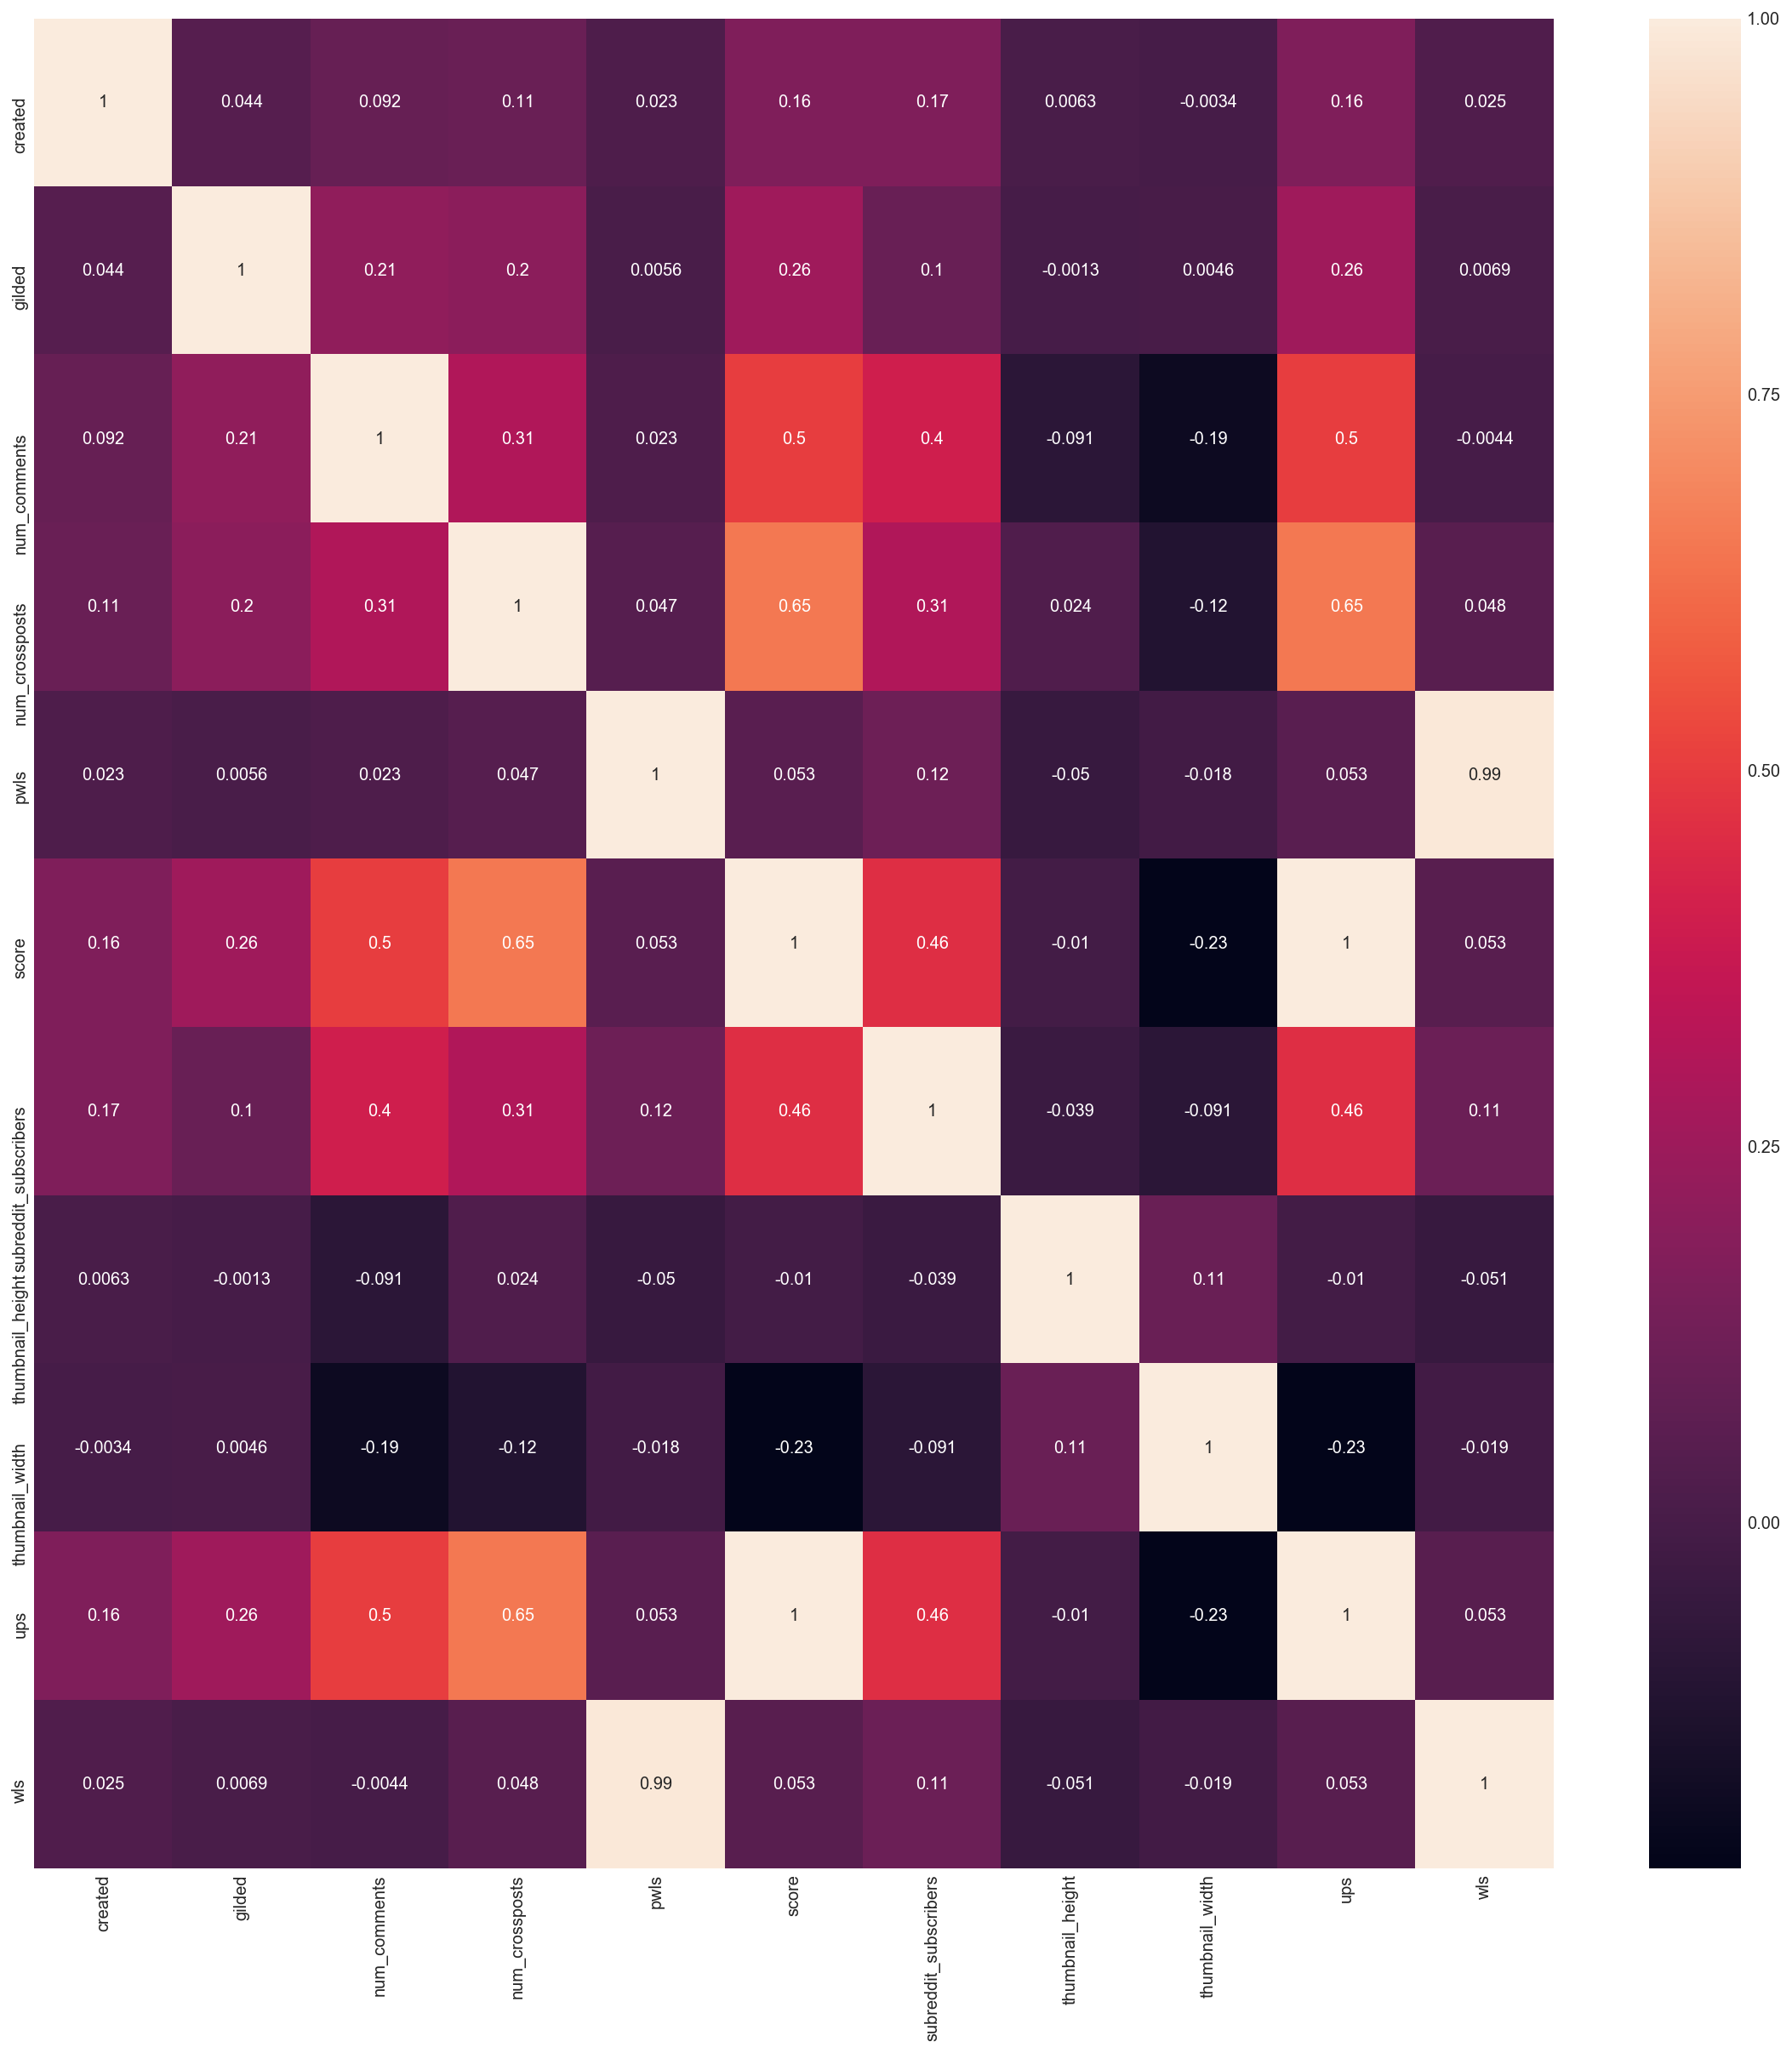

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)      # looking at the variables r/ship

In [39]:
# Saving the to csv for next work
#df.to_csv('Project3edapartone.csv')  # hold on commment for saving time while rerunning